# Paris Velib fun using DataFrames, matplotlib and folium

To get a JC Decaux API key:
https://developer.jcdecaux.com/#/home

Let's retrieve some real time data from JC Decaux open data API, and explore them:

In [1]:
import urllib
import pandas as pd

jc_decaux_api_key = "YOUR_KEY_HERE"
jc_decaux_api_url = "https://api.jcdecaux.com/vls/v1/stations?contract=Paris&apiKey=" + jc_decaux_api_key

with urllib.request.urlopen(jc_decaux_api_url) as response:
    velib_data = pd.read_json(response.read())

from datetime import datetime
now = datetime.now()
date_of_data=now.strftime('%Y/%m/%d %H:%M:%S')

print ('Data retrieved on: ' + str(date_of_data))
    
velib_data.head()

Data retrieved on: 2017/10/30 00:19:48


,address,available_bike_stands,available_bikes,banking,bike_stands,bonus,contract_name,last_update,name,number,position,status
0,RUE DES CHAMPEAUX (PRES DE LA GARE ROUTIERE) -...,48,1,True,50,True,Paris,1509318853000,31705 - CHAMPEAUX (BAGNOLET),31705,"{'lat': 48.8645278209514, 'lng': 2.41617072442...",OPEN
1,52 RUE D'ENGHIEN / ANGLE RUE DU FAUBOURG POISS...,8,25,True,33,False,Paris,1509318760000,10042 - POISSONNIÈRE - ENGHIEN,10042,"{'lat': 48.87242006305313, 'lng': 2.3483952362...",OPEN
2,74 BOULEVARD DES BATIGNOLLES - 75008 PARIS,41,3,True,44,True,Paris,1509318767000,08020 - METRO ROME,8020,"{'lat': 48.882148945631904, 'lng': 2.319860054...",OPEN
3,139 AVENUE JEAN LOLIVE / MAIL CHARLES DE GAULL...,12,6,True,25,False,Paris,1509318988000,35014 - DE GAULLE (PANTIN),35014,"{'lat': 48.893268664697416, 'lng': 2.412715733...",OPEN
4,57 & 36 RUE JULIEN LACROIX - 75020 PARIS,0,0,True,26,False,Paris,1509318966000,20040 - PARC DE BELLEVILLE,20040,"{'lat': 48.870393671603765, 'lng': 2.384222472...",OPEN


### Let's do some basic statistics:

In [2]:
print("There are {0} Velib stands in Paris".format(velib_data.address.count()))
print("There are {0} bike stands in total".format(velib_data.bike_stands.sum()))
print("There are {0} available bikes".format(velib_data.available_bikes.sum()))
print("There are {0} available bikes stands".format(velib_data.available_bike_stands.sum()))
print("")

bike_stands_max = velib_data.bike_stands.max()
bike_stands_max_query = "bike_stands == " + str(bike_stands_max)
print("Biggest stations with {0} bike stands:".format(bike_stands_max))
print(velib_data.query(bike_stands_max_query).address.values)
print("")

bike_stands_min = velib_data.bike_stands.min()
bike_stands_min_query = "bike_stands == " + str(bike_stands_min)
print("Smallest stations with {0} bike stands:".format(bike_stands_min))
print(velib_data.query(bike_stands_min_query).address.values)



There are 916 Velib stands in Paris
There are 30374 bike stands in total
There are 13084 available bikes
There are 15104 available bikes stands

Biggest stations with 72 bike stands:
['7 RUE DE METZ - 75010 PARIS' '29 BOULEVARD NEY - 75018 PARIS']

Smallest stations with 8 bike stands:
['1 PLACE HENRI ROLLET - 75015 PARIS' '3 RUE BOUDREAU - 75009 PARIS']


### Now extract the nested JSon position and add 2 columns (latitude, longitude) to the dataframe:


In [3]:
velib_data['latitude'] = velib_data['position'].apply(lambda x: x['lat'])
velib_data['longitude'] = velib_data['position'].apply(lambda x: x['lng'])
velib_data.head()


,address,available_bike_stands,available_bikes,banking,bike_stands,bonus,contract_name,last_update,name,number,position,status,latitude,longitude
0,RUE DES CHAMPEAUX (PRES DE LA GARE ROUTIERE) -...,48,1,True,50,True,Paris,1509318853000,31705 - CHAMPEAUX (BAGNOLET),31705,"{'lat': 48.8645278209514, 'lng': 2.41617072442...",OPEN,48.864528,2.416171
1,52 RUE D'ENGHIEN / ANGLE RUE DU FAUBOURG POISS...,8,25,True,33,False,Paris,1509318760000,10042 - POISSONNIÈRE - ENGHIEN,10042,"{'lat': 48.87242006305313, 'lng': 2.3483952362...",OPEN,48.872420,2.348395
2,74 BOULEVARD DES BATIGNOLLES - 75008 PARIS,41,3,True,44,True,Paris,1509318767000,08020 - METRO ROME,8020,"{'lat': 48.882148945631904, 'lng': 2.319860054...",OPEN,48.882149,2.319860
3,139 AVENUE JEAN LOLIVE / MAIL CHARLES DE GAULL...,12,6,True,25,False,Paris,1509318988000,35014 - DE GAULLE (PANTIN),35014,"{'lat': 48.893268664697416, 'lng': 2.412715733...",OPEN,48.893269,2.412716
4,57 & 36 RUE JULIEN LACROIX - 75020 PARIS,0,0,True,26,False,Paris,1509318966000,20040 - PARC DE BELLEVILLE,20040,"{'lat': 48.870393671603765, 'lng': 2.384222472...",OPEN,48.870394,2.384222


### Plot the stations using a scatter graph from matplotlib

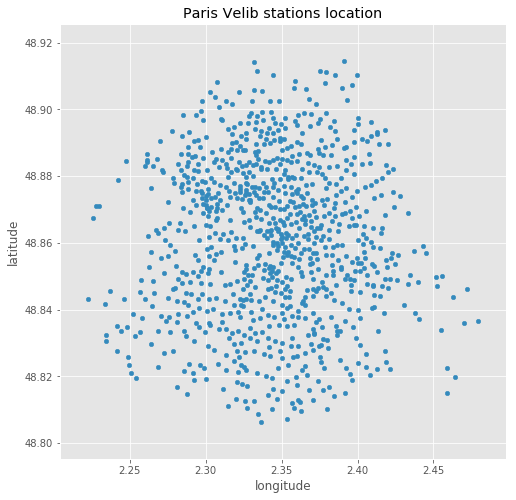

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 8))
velib_data.plot(ax = ax, kind='scatter', y='latitude', x='longitude', title='Paris Velib stations location');

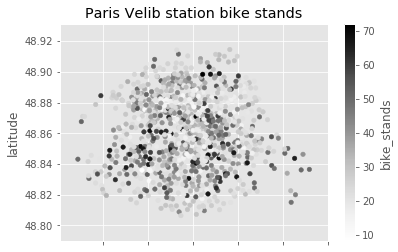

In [5]:
velib_data.plot(kind='scatter', y='latitude', x='longitude' , c='bike_stands', title='Paris Velib station bike stands');

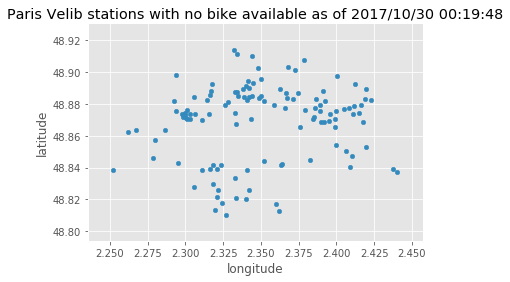

In [6]:
velib_data.query("available_bikes == 0").plot.scatter(y='latitude', x='longitude',
                                                      title='Paris Velib stations with no bike available as of '+str(date_of_data));

### Now extract a postcode from the addresses using a regular expression, and store it in a new column. Then draw a histogram to show how many stations there are by area:

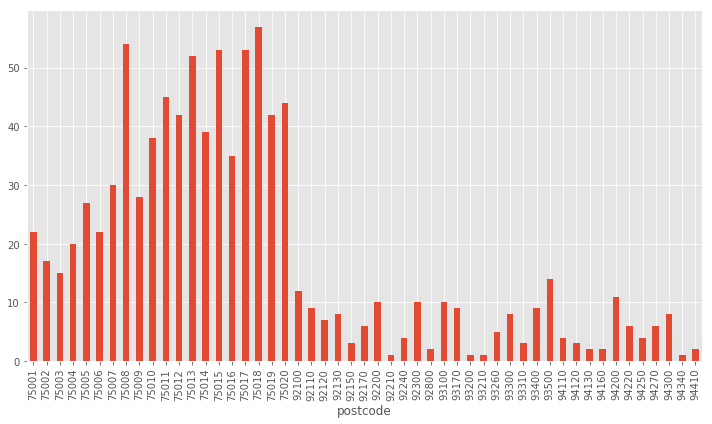

In [7]:
import re
velib_data['postcode'] = velib_data['address'].apply(lambda x: re.findall('\d{5}',x)[0] )
plt.figure(figsize=(10, 6))
velib_data.groupby('postcode').size().plot.bar();
plt.tight_layout()

### Compute the percentage of available bikes by station. Then plot the result.

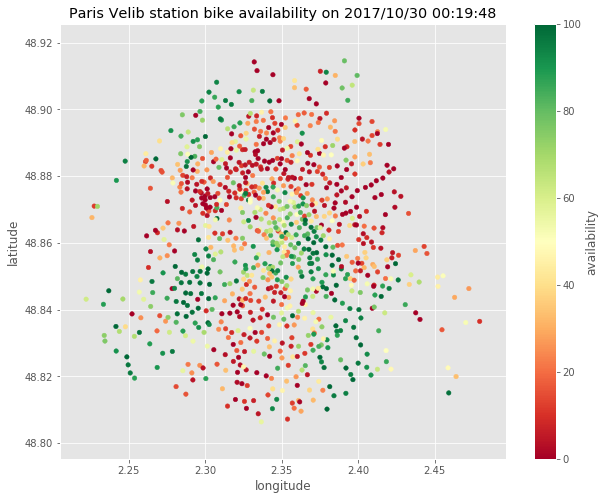

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
velib_data['availability'] = 100 * velib_data['available_bikes'] / velib_data['bike_stands']
velib_data.plot(ax = ax, kind='scatter', y='latitude', x='longitude' , c='availability', cmap=plt.get_cmap('RdYlGn'));

plt.title('Paris Velib station bike availability on ' + date_of_data);




### Draw the real time bike availability heatmap using folium

In [10]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[48.86, 2.35], zoom_start=12)

data = [[a,b,c] for a,b,c in zip(velib_data.latitude.values,
                                 velib_data.longitude.values,
                                 velib_data.availability.values) ]
gradient={'0': 'Red','0.5': 'Yellow','1': 'Green'}

# plot heatmap
m.add_child(HeatMap(data, radius=7, gradient=gradient) )

display(m)

### Display location of station with bonuses
These stations are located up hill (Montmartre, Belleville, Montagne Ste Genevieve, ...)
You get a reward if you get your bike back there ;)

In [11]:
m = folium.Map(location=[48.86, 2.35], zoom_start=12)
df = velib_data.query("bonus == True")
for lat,lon in zip(df.latitude,df.longitude):
    folium.CircleMarker(location = [lat, lon], radius=7 ).add_to(m)
display(m)